In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fundus_data_toolkit.data_aug import DAType
from fundus_data_toolkit.datamodules import SEG_PATHS, Task, register_paths
from fundus_data_toolkit.datamodules.segmentation import (
    DDRDataModule_s,
    FGADRDataModule_s,
    IDRiDDataModule_s,
    MESSIDORDataModule_s,
    RETLESDataModule_s,
    TJDRDataModule_s,
)
from fundus_data_toolkit.datamodules.utils import merge_existing_datamodules
from nntools import NNOpt

In [3]:
# paths = {
#     "IDRID": "/home/clement/Documents/data/IDRID/A. Segmentation/",
#     "FGADR": "/home/clement/Documents/data/FGADR/Seg-set/",
#     "MESSIDOR": "/home/clement/Documents/data/MAPLES-DR/",
#     "DDR": "/home/clement/Documents/data/DDR-dataset/lesion_segmentation/",
#     "RETLES": "/home/clement/Documents/data/retinal-lesions-v20191227/",
#     "TJDR": "/home/clement/Documents/data/TJDR/",
# }
# register_paths(paths, task=Task.SEGMENTATION)
SEG_PATHS

{'IDRID': '/home/clement/Documents/data/IDRID/A. Segmentation/',
 'FGADR': '/home/clement/Documents/data/FGADR/Seg-set/',
 'MESSIDOR': '/home/clement/Documents/data/MAPLES-DR/',
 'DDR': '/home/clement/Documents/data/DDR-dataset/lesion_segmentation/',
 'RETLES': '/home/clement/Documents/data/retinal-lesions-v20191227/',
 'TJDR': '/home/clement/Documents/data/TJDR/'}

/home/clement/Documents/Projets/NNTools/src/nntools/utils/plotting.py:146: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cax.set_yticklabels(labels=classes)
/home/clement/Documents/Projets/NNTools/src/nntools/utils/plotting.py:146: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cax.set_yticklabels(labels=classes)
/home/clement/Documents/Projets/NNTools/src/nntools/utils/plotting.py:151: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


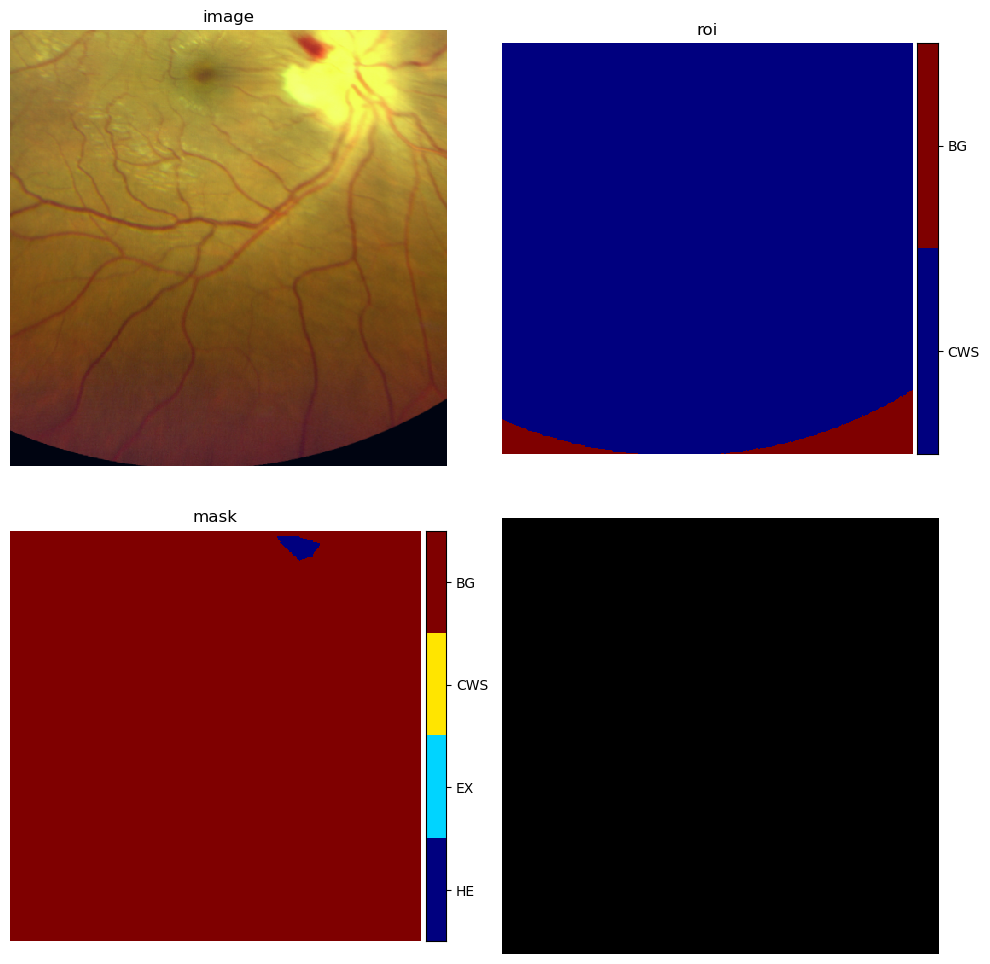

In [8]:
use_cache = True
ddr_datamodule = DDRDataModule_s(
    SEG_PATHS.DDR,
    img_size=(1024, 1024),
    batch_size=32,
    precise_autocrop=True,
    data_augmentation_type=DAType.LIGHT,
    use_cache=use_cache,
    num_workers=8,
    random_crop=(512, 512),
    cache_option=NNOpt.CACHE_MEMORY,
).setup_all()
# ddr_datamodule.train.plot(150, classes=['BG', 'CWS', 'EX', 'HE', 'MA'])

retles_datamodule = RETLESDataModule_s(
    SEG_PATHS.RETLES,
    img_size=(1024, 1024),
    batch_size=32,
    precise_autocrop=True,
    data_augmentation_type=DAType.LIGHT,
    use_cache=use_cache,
    num_workers=8,
    random_crop=(512, 512),
    cache_option=NNOpt.CACHE_MEMORY,
).setup_all()
# retles_datamodule.train.plot(0, classes=['BG', 'CWS', 'EX', 'HE', 'MA'])

idrid_datamodule = IDRiDDataModule_s(
    SEG_PATHS.IDRID,
    img_size=(1024, 1024),
    batch_size=32,
    precise_autocrop=True,
    data_augmentation_type=DAType.LIGHT,
    use_cache=use_cache,
    num_workers=8,
    random_crop=(512, 512),
    cache_option=NNOpt.CACHE_MEMORY,
).setup_all()
# idrid_datamodule.train.plot(0, classes=['BG', 'CWS', 'EX', 'HE', 'MA'])


fgadr_datamodule = FGADRDataModule_s(
    SEG_PATHS.FGADR,
    img_size=(1024, 1024),
    batch_size=32,
    precise_autocrop=True,
    data_augmentation_type=DAType.LIGHT,
    use_cache=use_cache,
    num_workers=8,
    random_crop=(512, 512),
    cache_option=NNOpt.CACHE_MEMORY,
).setup_all()
# fgadr_datamodule.train.plot(0, classes=['BG', 'CWS', 'EX', 'HE', 'MA'])

messidor_datamodule = MESSIDORDataModule_s(
    SEG_PATHS.MESSIDOR,
    img_size=(1024, 1024),
    batch_size=32,
    precise_autocrop=True,
    data_augmentation_type=DAType.LIGHT,
    use_cache=use_cache,
    num_workers=8,
    random_crop=(512, 512),
    cache_option=NNOpt.CACHE_MEMORY,
).setup_all()
# messidor_datamodule.train.plot(0, classes=['BG', 'CWS', 'EX', 'HE', 'MA'])

tjdr_data_module = TJDRDataModule_s(
    SEG_PATHS.TJDR,
    img_size=(1024, 1024),
    batch_size=32,
    precise_autocrop=True,
    data_augmentation_type=DAType.LIGHT,
    use_cache=use_cache,
    num_workers=8,
    random_crop=(512, 512),
    cache_option=NNOpt.CACHE_MEMORY,
).setup_all()

tjdr_data_module.train.plot(105, classes=["BG", "CWS", "EX", "HE", "MA"])

In [9]:
all_datamodules = merge_existing_datamodules(
    [ddr_datamodule, retles_datamodule, idrid_datamodule, fgadr_datamodule, messidor_datamodule, tjdr_data_module]
)

/home/clement/Documents/Projets/NNTools/src/nntools/dataset/viewer.py:135: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


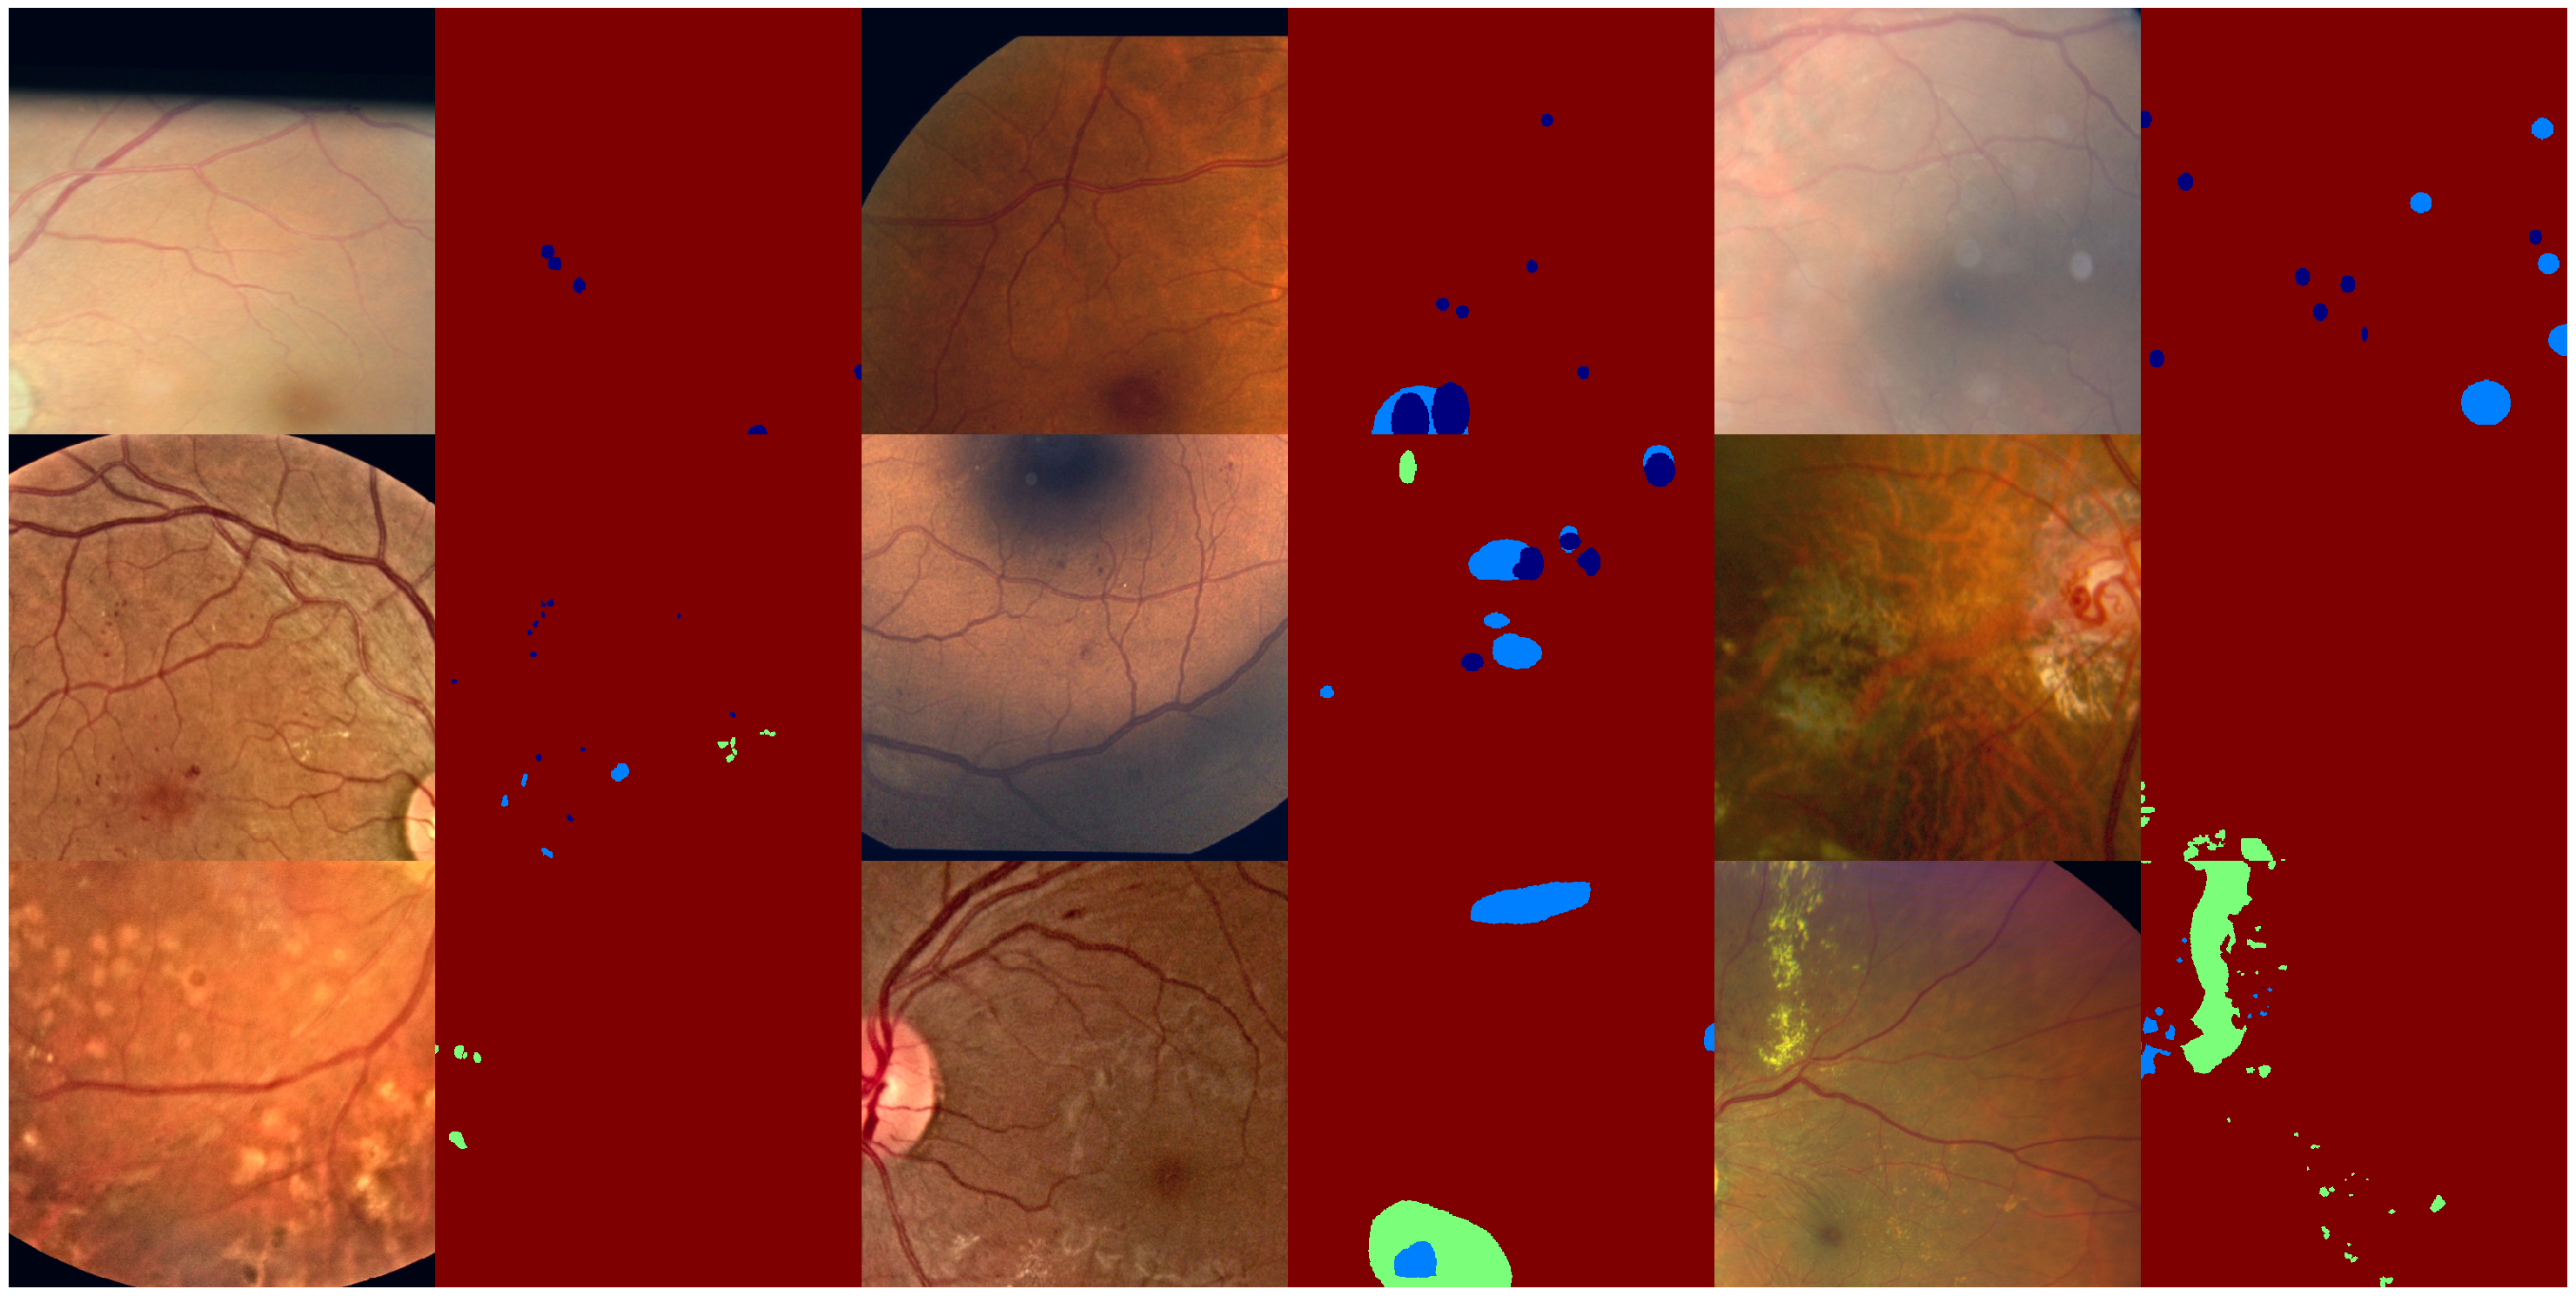

In [10]:
[d.set_ignore_key("roi") for d in all_datamodules.train.datasets]
_ = all_datamodules.train.get_mosaic(9, show=True, shuffle=True, n_classes=5)

In [11]:
dataloader = all_datamodules.train_dataloader()
from tqdm.notebook import tqdm

for batch in tqdm(dataloader, total=len(dataloader)):
    pass

  0%|          | 0/236 [00:00<?, ?it/s]

In [12]:
# Check if the cache mechanism works
for batch in tqdm(dataloader, total=len(dataloader)):
    pass

  0%|          | 0/236 [00:00<?, ?it/s]